In [14]:


import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [15]:
import pandas as pd

df = pd.read_csv('/content/parkinson_data.csv')

print(df.head())  # Display first few rows to verify


   age  eye_blinking  handshaking  MDVP:Fo(Hz)  result
0   52             1            1         92.5       1
1   47             0            1         88.3       1
2   55             1            0         95.7       1
3   36             0            0        153.2       0
4   43             1            1        102.1       0


In [16]:
df.head()


,age,eye_blinking,handshaking,MDVP:Fo(Hz),result
0,52,1,1,92.5,1
1,47,0,1,88.3,1
2,55,1,0,95.7,1
3,36,0,0,153.2,0
4,43,1,1,102.1,0


In [17]:
df.tail()

,age,eye_blinking,handshaking,MDVP:Fo(Hz),result
43,42,0,0,79.6,0
44,58,1,1,96.7,1
45,35,1,0,100.0,0
46,48,0,1,90.4,1
47,54,1,0,115.9,0


In [18]:

print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 5
Number of Instances In Dataset :  48


In [19]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 5
Number of Instances In Dataset :  48


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           48 non-null     int64  
 1   eye_blinking  48 non-null     int64  
 2   handshaking   48 non-null     int64  
 3   MDVP:Fo(Hz)   48 non-null     float64
 4   result        48 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.0 KB


In [21]:

df.describe()

,age,eye_blinking,handshaking,MDVP:Fo(Hz),result
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,45.812500,0.562500,0.520833,101.279167,0.520833
std,8.569258,0.501328,0.504852,19.526752,0.504852
min,31.000000,0.000000,0.000000,76.800000,0.000000
25%,38.750000,0.000000,0.000000,90.275000,0.000000
50%,46.500000,1.000000,1.000000,97.000000,1.000000
75%,53.250000,1.000000,1.000000,102.500000,1.000000
max,59.000000,1.000000,1.000000,167.300000,1.000000


In [22]:
df['result'] = df['result'].astype('uint8')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           48 non-null     int64  
 1   eye_blinking  48 non-null     int64  
 2   handshaking   48 non-null     int64  
 3   MDVP:Fo(Hz)   48 non-null     float64
 4   result        48 non-null     uint8  
dtypes: float64(1), int64(3), uint8(1)
memory usage: 1.7 KB


In [24]:
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [25]:
df.isna().sum()

,0
age,0
eye_blinking,0
handshaking,0
MDVP:Fo(Hz),0
result,0


<Axes: xlabel='result', ylabel='count'>

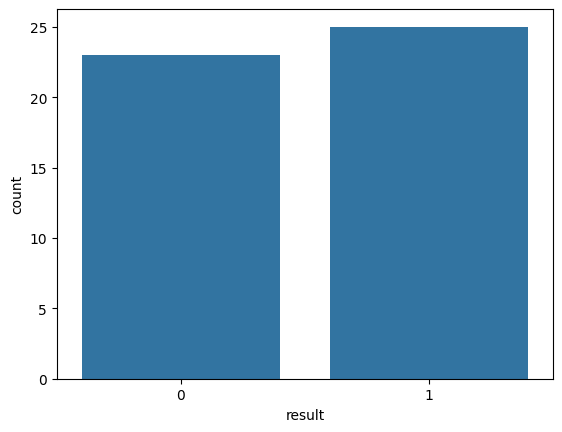

In [26]:
sns.countplot(x='result',data=df)

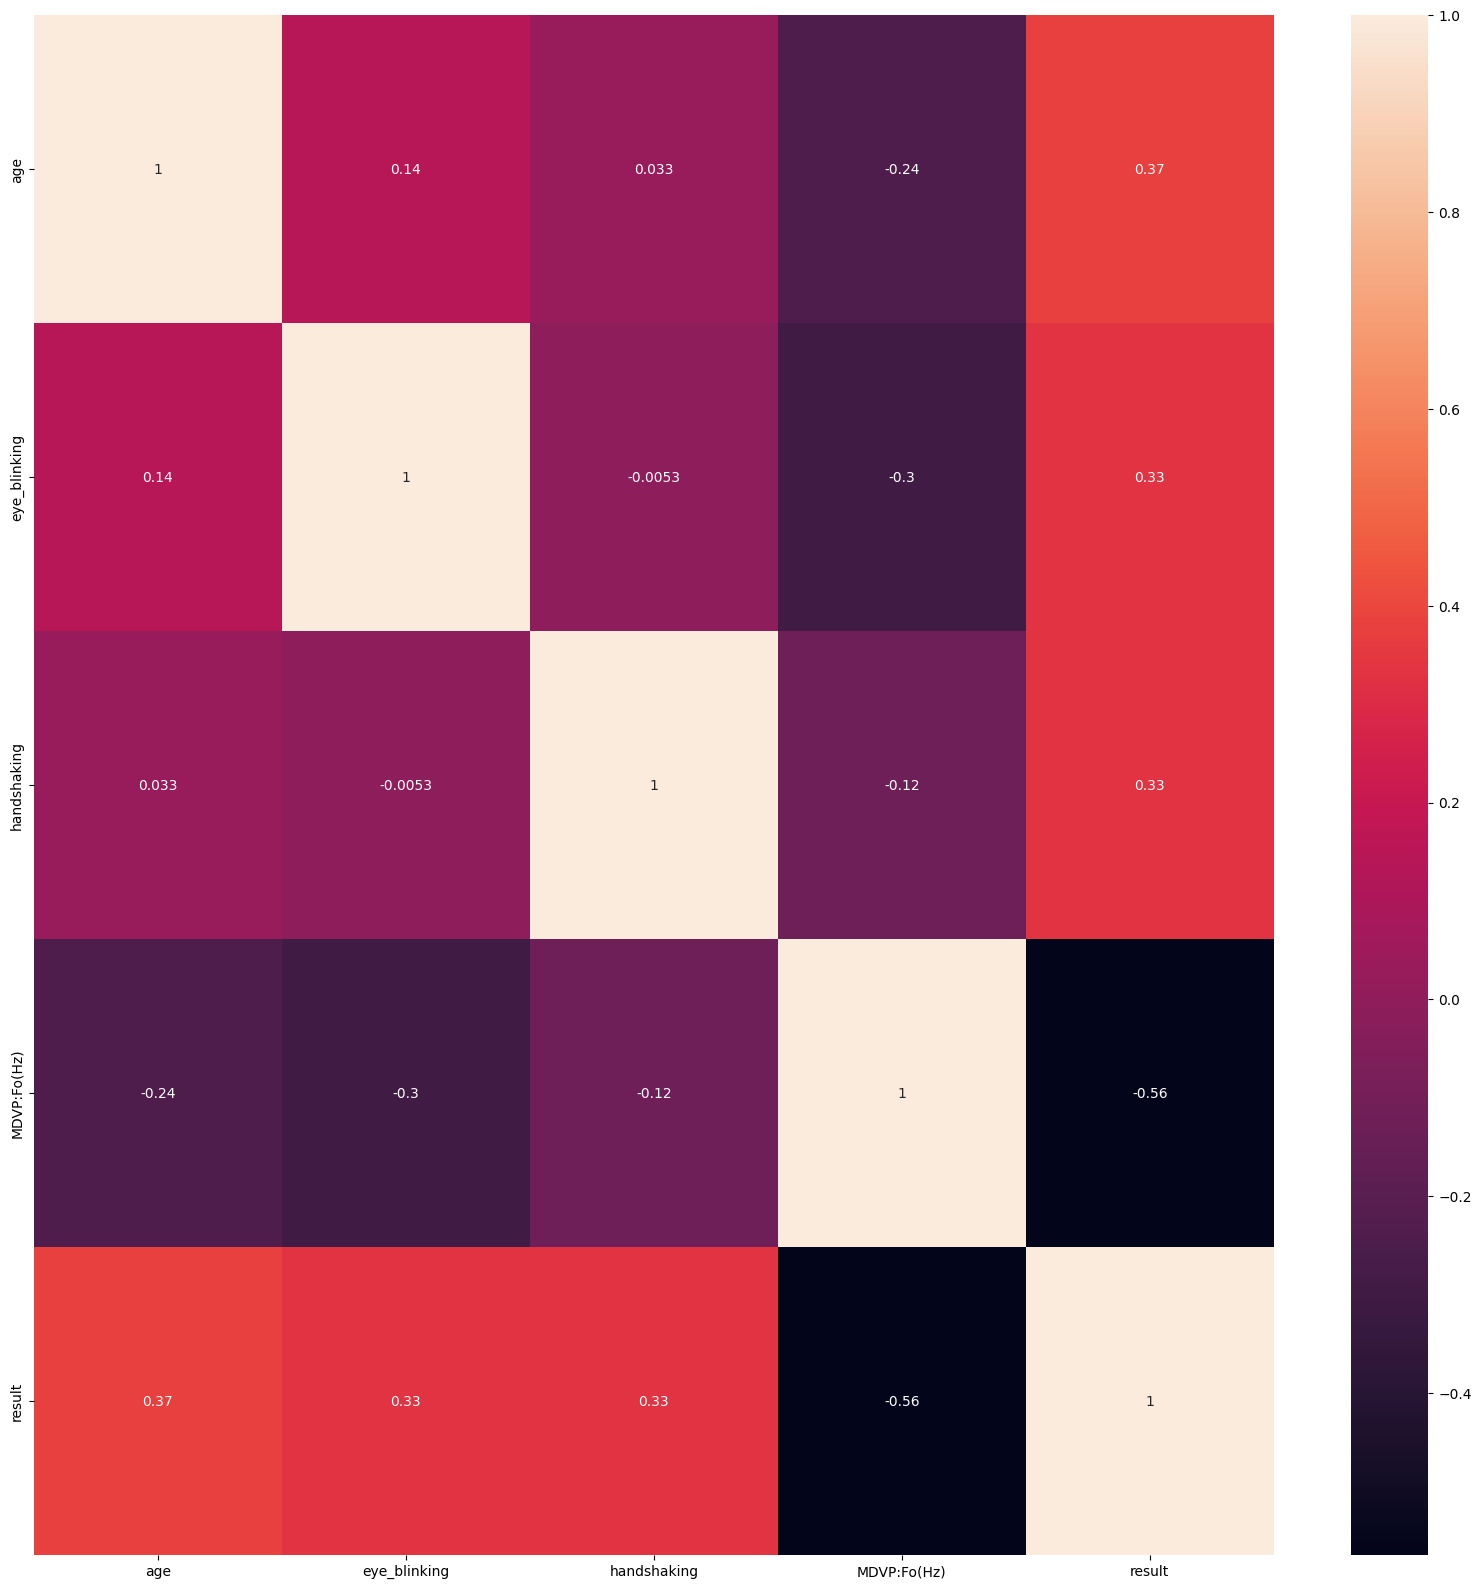

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, ax=ax)
plt.show()


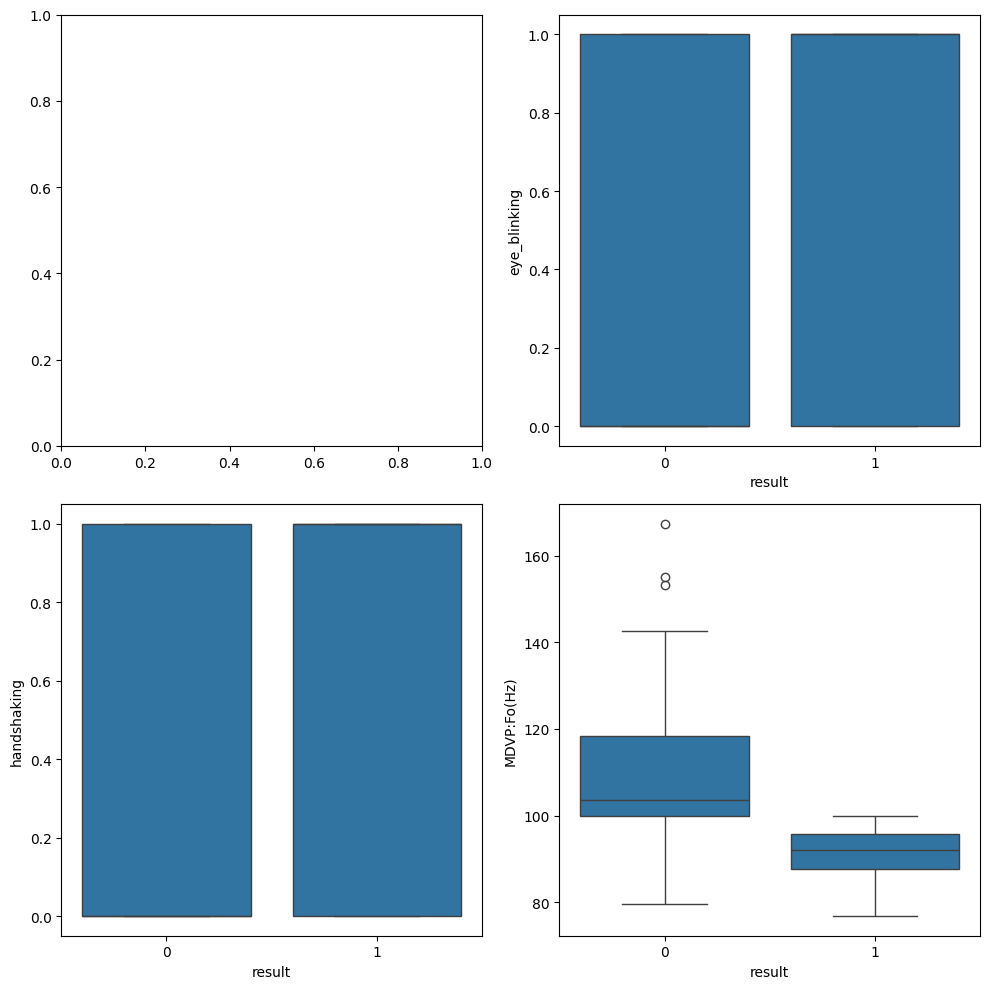

In [28]:
#Box Plot
fig,axes=plt.subplots(2,2,figsize=(10,10))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.boxplot(x='result',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()

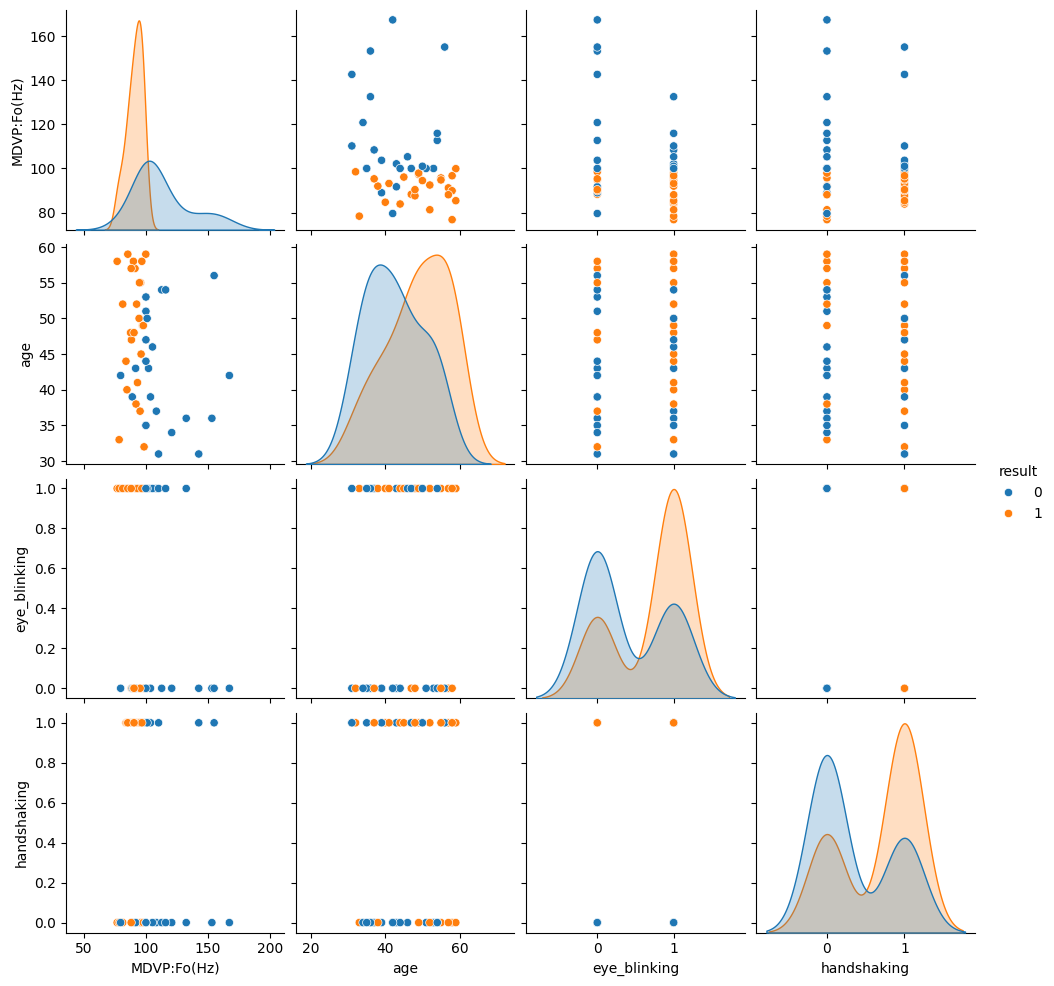

In [29]:

plt.rcParams['figure.figsize'] = (15, 4)
sns.pairplot(df,hue = 'result', vars = ['MDVP:Fo(Hz)','age','eye_blinking','handshaking', ] )
plt.show()

In [30]:
df['result'].value_counts()

,count
result,
1,25
0,23


In [31]:
X = df.drop(['result'], axis=1)
y = df['result']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (48, 4)
Target (y) Shape Before Balancing : (48,)


In [32]:
sm = SMOTE(random_state=300)

sm = SMOTE(random_state=300)
     

In [33]:
# Encode categorical data in X
X = X.apply(lambda col: col.map({'yes': 1, 'no': 0}) if col.dtype == 'object' else col)

# Encode categorical target variable (y)
if y.dtype == 'object':
    y = y.map({'yes': 1, 'no': 0})


In [34]:

X, y = sm.fit_resample(X, y)

In [35]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (50, 4)
Target (y) Shape After Balancing : (50,)


In [36]:
scaler = MinMaxScaler((-1,1))

In [37]:
X_features = scaler.fit_transform(X)
Y_labels = y

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_labels, test_size=0.20, random_state=20)


from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)
     

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [40]:
param_grid = {
    'max_features': ['sqrt', 'log2', None],  # Removed 'auto' and added None
    'max_depth': range(1, 10),
    'random_state': range(30, 210, 30),
    'criterion': ['gini', 'entropy']
}

from sklearn.model_selection import GridSearchCV
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
CV_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2', None],
                         'random_state': range(30, 210, 30)})

In [41]:
# prompt: CV_dt.best_params_

CV_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'random_state': 180}

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Corrected: Use 'sqrt' or 'log2' instead of 'auto'
dt1 = DecisionTreeClassifier(random_state=120, max_features='sqrt', max_depth=6, criterion='entropy')

# Fit the model
dt1.fit(X_train, y_train)

# Make predictions
predDT = dt1.predict(X_test)

# Print classification report
print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



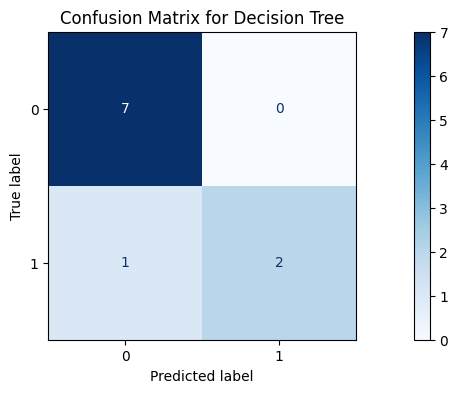

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, predDT)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Decision Tree')
plt.show()


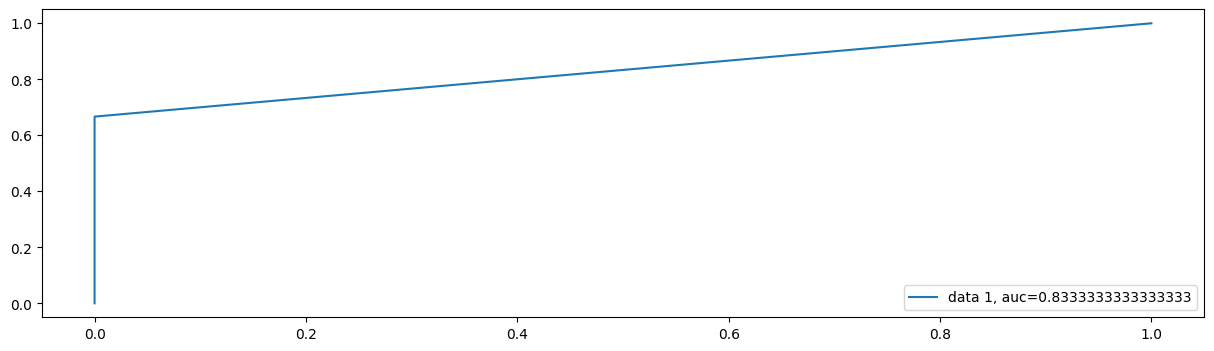

In [44]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [45]:
import joblib  # Import joblib

# Dumping Decision Tree Classifier
joblib.dump(dt1, 'dt_clf.pkl')


['dt_clf.pkl']

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.67      0.80         3

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



In [47]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
CV_rfc=random_search.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [48]:
CV_rfc.best_params_

{'random_state': 90,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'entropy'}

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fix: Use 'sqrt' or 'log2' instead of 'auto'
rfc1 = RandomForestClassifier(
    random_state=200,
    max_features='sqrt',  # Fixed this line
    n_estimators=125,
    max_depth=7,
    criterion='entropy'
)

rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



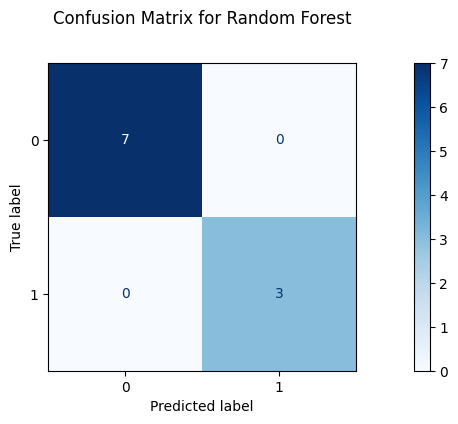

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(rfc1, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.show()


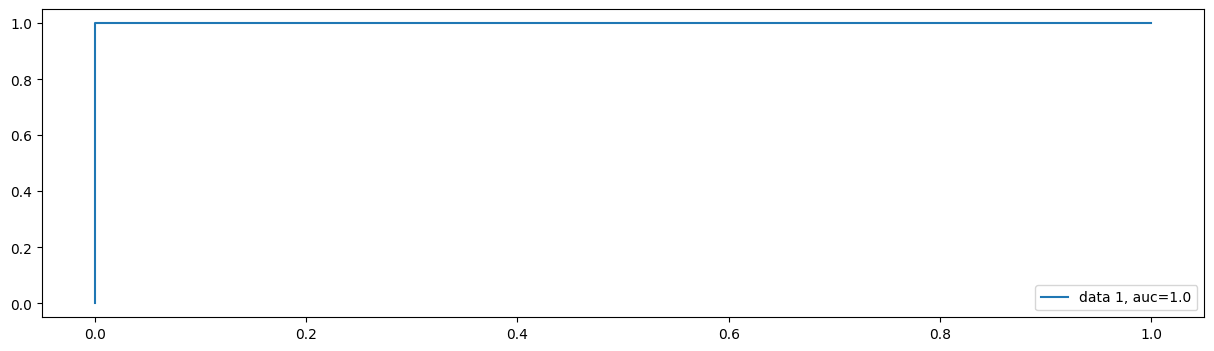

In [51]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
joblib.dump(rfc1, 'rf_clf.pkl')

['rf_clf.pkl']

In [53]:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)


In [54]:

print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10

Confusion Matrix:


array([[5, 2],
       [1, 2]])

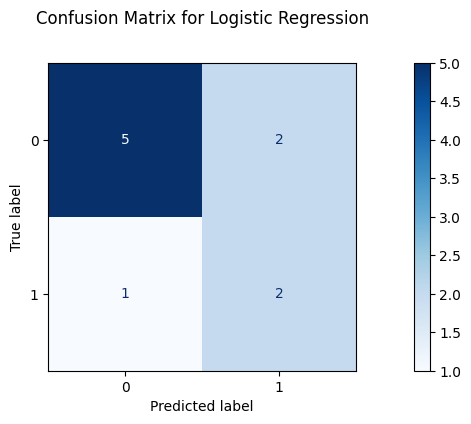

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(logmodel, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.show()


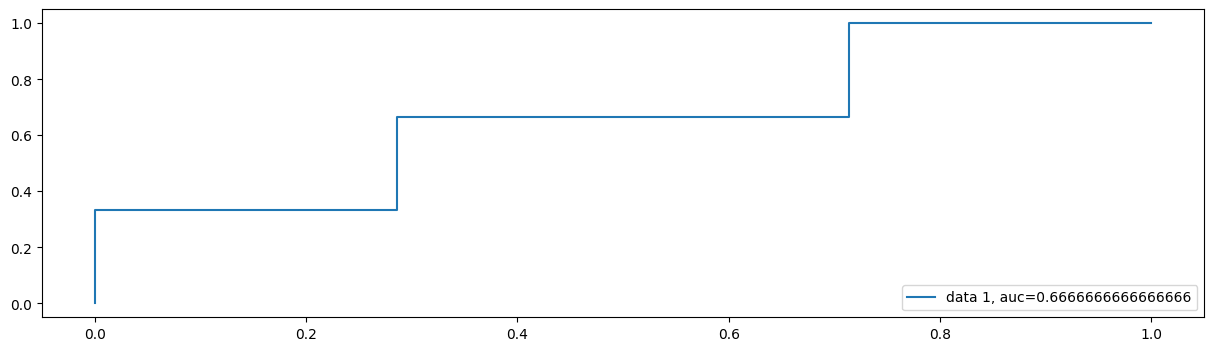

In [56]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [57]:
joblib.dump(logmodel, 'lg_clf.pkl')

['lg_clf.pkl']

In [58]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.7
Train Set Accuracy: 0.875


In [59]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.600 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.857 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.727 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

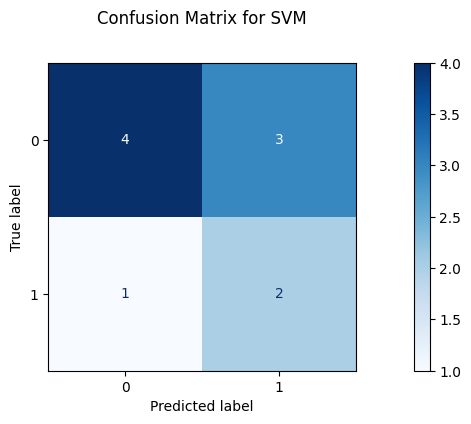

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_SVC, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for SVM', y=1.1)
plt.show()


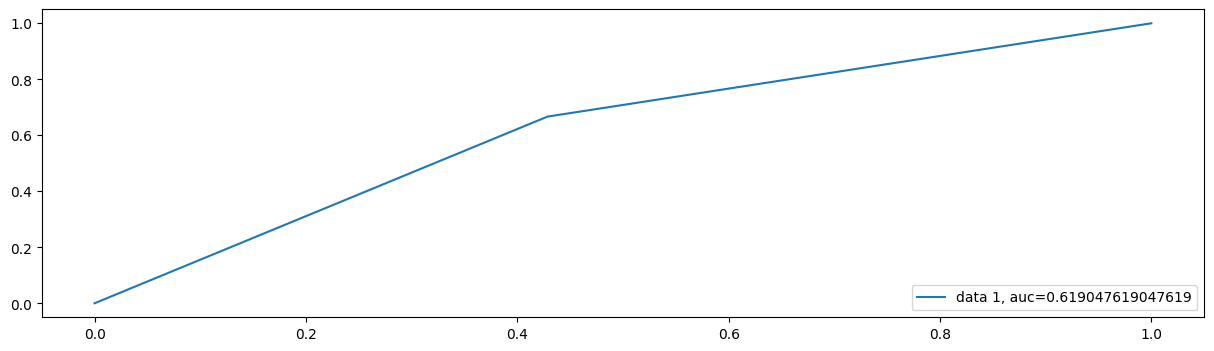

In [61]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [62]:
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

In [63]:
import joblib
import sklearn
model = joblib.load("svm_clf.pkl")  # Load in your system
joblib.dump(model, "svm_clf_compatible.pkl")  # Save it again


['svm_clf_compatible.pkl']

In [65]:

# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



In [66]:

print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[6, 1],
       [1, 2]])

In [67]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 80.0


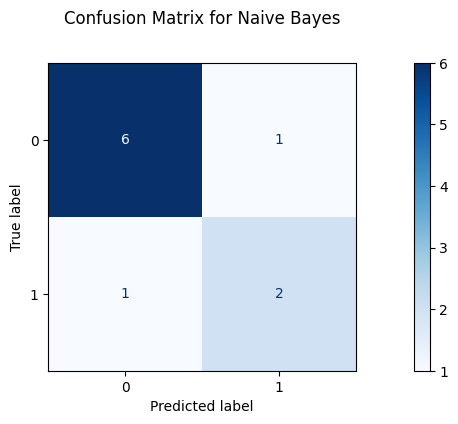

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for Naive Bayes', y=1.1)
plt.show()


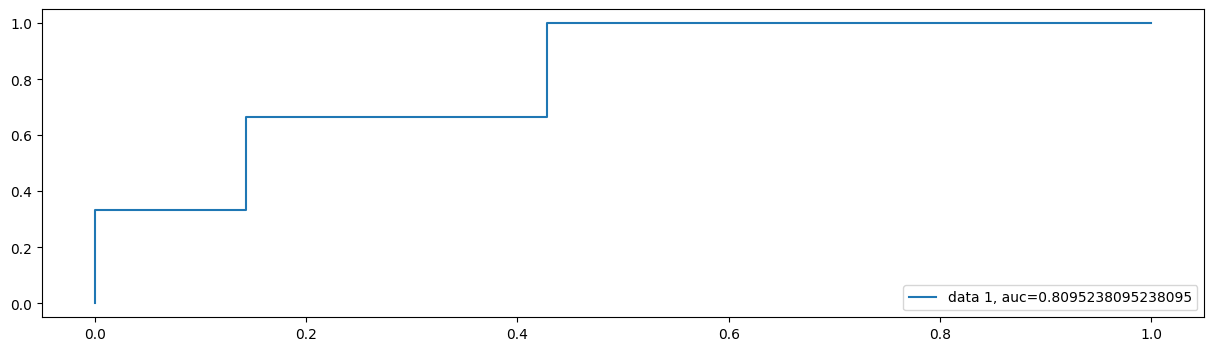

In [69]:

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [70]:
joblib.dump(gnb, 'nb_clf.pkl')

['nb_clf.pkl']

In [71]:
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.6, 0.6, 0.7, 0.6, 0.6, 0.6, 0.6, 0.6]


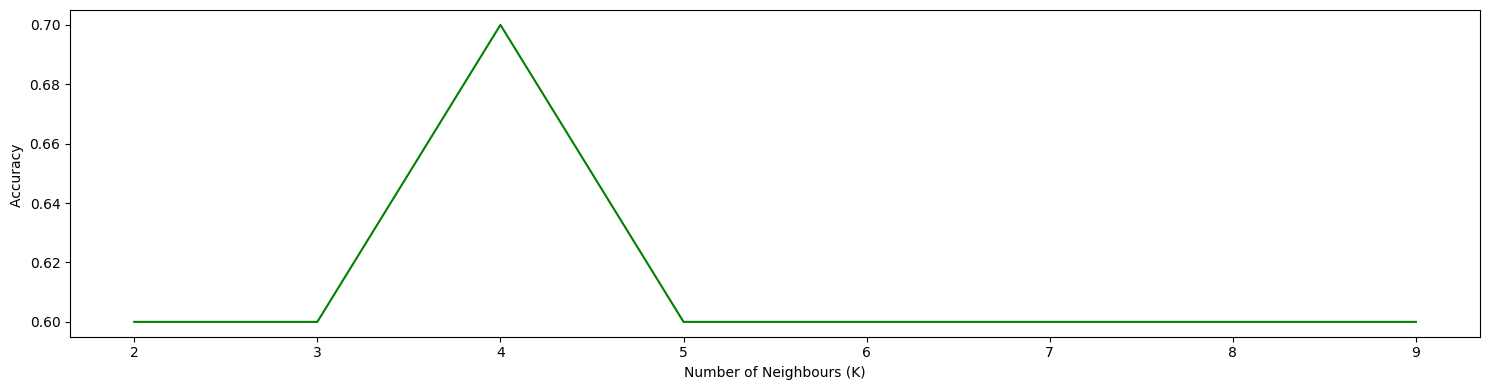

In [72]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [73]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)

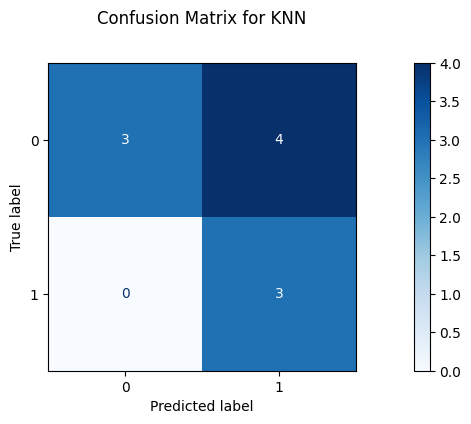

In [74]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)

# Add title
plt.title('Confusion Matrix for KNN', y=1.1)
plt.show()


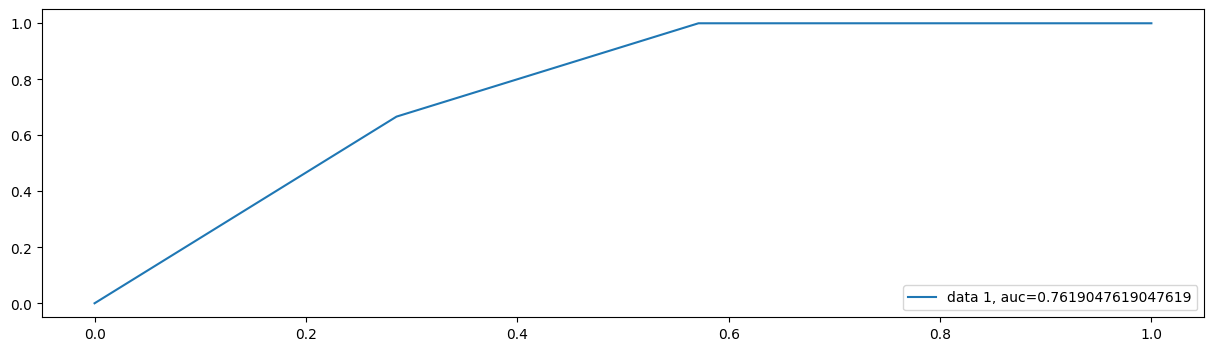

In [75]:

y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [76]:
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

In [77]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],
}
chart = pd.DataFrame(chart)

In [78]:
display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN
0,Accuracy,0.900000,1.0,0.700000,0.600000,0.800000,0.600000
1,F1-Score,0.800000,1.0,0.571429,0.500000,0.666667,0.600000
2,Recall,0.666667,1.0,0.666667,0.666667,0.666667,1.000000
3,Precision,1.000000,1.0,0.500000,0.400000,0.666667,0.428571
4,R2-Score,0.523810,1.0,-0.428571,-0.904762,0.047619,-0.904762


In [79]:
!pip install flask-cors


if __name__ == '__main__':
    app.run(port=5000, debug=False)  # Set debug to False to suppress some warnings


In [81]:
import numpy as np
import pickle

# Load the trained model (Ensure 'model.pkl' is your saved model)
#with open("svm_clf_compatible.pkl", "rb") as file:
 #   model = pickle.load(file)

# Example single data point (Modify based on your feature order)
single_data = np.array([[49, 95.73, 0, 1]])  # (age, MDVP:Fo(Hz), handshaking, Eye blinking)

# Make prediction
prediction = rfc.predict(single_data)

# Print result
if prediction[0] == 1:
    print("The model predicts: Parkinson's Disease Detected")
else:
    print("The model predicts: No Parkinson's Disease")

The model predicts: No Parkinson's Disease
